In [1]:
%matplotlib notebook
import copy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy.io.fits as pf
from astropy.modeling import models
from astropy.stats import mad_std
from astropy.table import QTable
from astropy import units as u
from astropy.visualization import ZScaleInterval
from astropy.nddata import StdDevUncertainty
import ccdproc as ccdp
import specutils
import specutils.fitting as spf
from specutils.manipulation import extract_region
from specutils import Spectrum1D, SpectralRegion
from specutils.manipulation import LinearInterpolatedResampler
from iraf_um import imstat

In [2]:
#import des données
M76_Spectrum_Mo=pf.open('19-09-22/reduced/M76_Spectrum.fit',ignore_missing_end=True)
M76_Spectrum_Tu=pf.open('20-09-22/reduced/M76_Spectrum.fit',ignore_missing_end=True)
M76_Spectrum_We=pf.open('21-09-22/reduced/M76_Spectrum.fit',ignore_missing_end=True)
M76_Spectrum_Th=pf.open('22-09-22/reduced/M76_Spectrum.fit',ignore_missing_end=True)

In [3]:
#Création des spectres 1D et Interpolation des spectres pour les sommer
M76_Mo = Spectrum1D(
    spectral_axis=M76_Spectrum_Mo[1].data['wavelength']*u.AA,
    flux=M76_Spectrum_Mo[1].data['flux']*u.mW/u.m/u.cm,
    uncertainty=StdDevUncertainty(M76_Spectrum_Mo[1].data['uncertainty'])
    )
M76_Tu = Spectrum1D(
    spectral_axis=M76_Spectrum_Tu[1].data['wavelength']*u.AA,
    flux=M76_Spectrum_Tu[1].data['flux']*u.mW/u.m/u.cm,
    uncertainty=StdDevUncertainty(M76_Spectrum_Tu[1].data['uncertainty'])
    )
M76_We = Spectrum1D(
    spectral_axis=M76_Spectrum_We[1].data['wavelength']*u.AA,
    flux=M76_Spectrum_We[1].data['flux']*u.mW/u.m/u.cm,
    uncertainty=StdDevUncertainty(M76_Spectrum_We[1].data['uncertainty'])
    )
M76_Th = Spectrum1D(
    spectral_axis=M76_Spectrum_Th[1].data['wavelength']*u.AA,
    flux=M76_Spectrum_Th[1].data['flux']*u.mW/u.m/u.cm,
    uncertainty=StdDevUncertainty(M76_Spectrum_Th[1].data['uncertainty'])
    )

fluxc_resample = LinearInterpolatedResampler()
M76_We=fluxc_resample(M76_We,M76_Mo.spectral_axis)
M76_Th=fluxc_resample(M76_Th,M76_Mo.spectral_axis)

In [4]:
#Combinaison des Spectres
Blue_M76 = Spectrum1D(
    spectral_axis=M76_Mo.spectral_axis,
    flux=(M76_Mo.flux+M76_We.flux+M76_Th.flux)/3,
    uncertainty=StdDevUncertainty(np.sqrt((M76_Mo.uncertainty.array**2+M76_We.uncertainty.array**2+M76_Th.uncertainty.array**2)/3))
    )
Red_M76 = M76_Tu

<IPython.core.display.Javascript object>


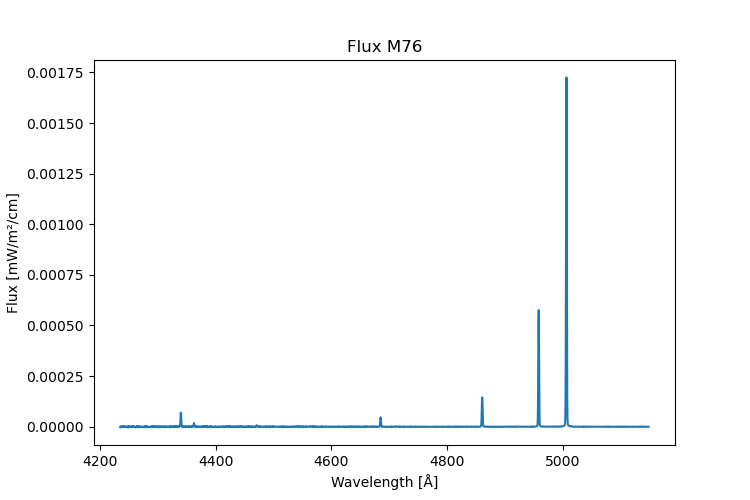

<IPython.core.display.Javascript object>


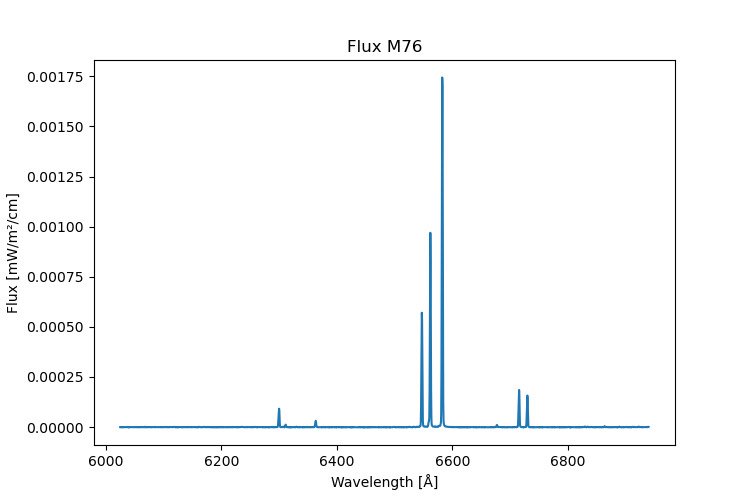

In [5]:
#Plots
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
ax.plot(Blue_M76.spectral_axis, Blue_M76.flux)
ax.set_xlabel("Wavelength [Å]")
ax.set_ylabel("Flux [mW/m²/cm]")
ax.set_title("Flux M76")
plt.show()
fig, ax2 = plt.subplots(1, 1, figsize=(7.5, 5))
ax2.plot(Red_M76.spectral_axis, Red_M76.flux)
ax2.set_xlabel("Wavelength [Å]")
ax2.set_ylabel("Flux [mW/m²/cm]")
ax2.set_title("Flux M76")
plt.show()

<IPython.core.display.Javascript object>


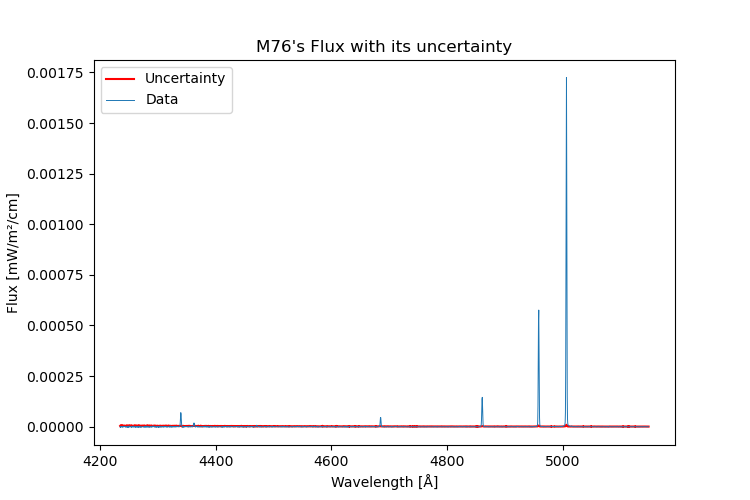

<IPython.core.display.Javascript object>


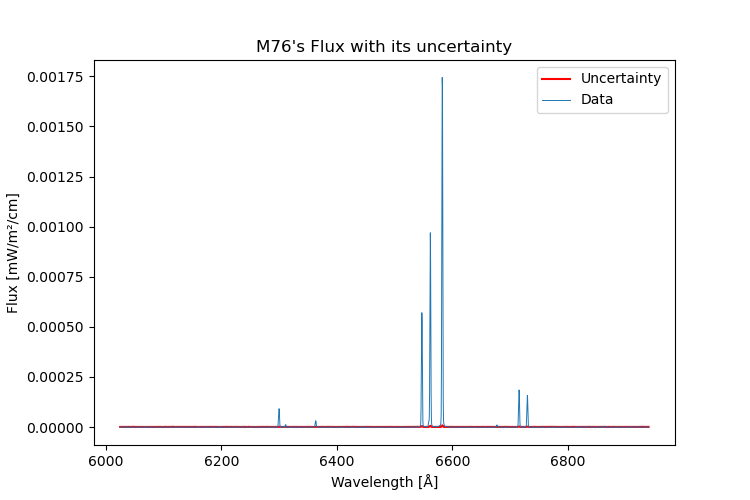

In [6]:
#Plots Uncertainties
fig, ax = plt.subplots(1, 1, figsize=(7.5, 5))
ax.plot(Blue_M76.spectral_axis, Blue_M76.uncertainty.array,c="red",label="Uncertainty")
ax.plot(Blue_M76.spectral_axis, Blue_M76.flux, lw=0.7, label="Data")
ax.set_xlabel("Wavelength [Å]")
ax.set_ylabel("Flux [mW/m²/cm]")
ax.set_title("M76's Flux with its uncertainty")
ax.legend()
plt.show()

fig, ax2 = plt.subplots(1, 1, figsize=(7.5, 5))
ax2.plot(Red_M76.spectral_axis, Red_M76.uncertainty.array,c="red",label="Uncertainty")
ax2.plot(Red_M76.spectral_axis, Red_M76.flux, lw=0.7, label="Data")
ax2.set_xlabel("Wavelength [Å]")
ax2.set_ylabel("Flux [mW/m²/cm]")
ax2.set_title("M76's Flux with its uncertainty")
ax2.legend()
plt.show()

6 emission lines identified
   line_center     line_type line_center_index
     Angstrom                                 
------------------ --------- -----------------
4339.6590019370105  emission               234
  4362.48895818437  emission               285
 4684.794920973733  emission              1005
 4860.273160020038  emission              1397
4957.8607152971845  emission              1615
 5005.759237996646  emission              1722
7 emission lines identified
   line_center    line_type line_center_index
     Angstrom                                
----------------- --------- -----------------
6299.723014052354  emission               615
6363.259951578966  emission               757
6547.101680394723  emission              1168
 6561.85899249102  emission              1201
6582.428872842603  emission              1247
6715.660018573581  emission              1545
6729.964050226925  emission              1577


<IPython.core.display.Javascript object>


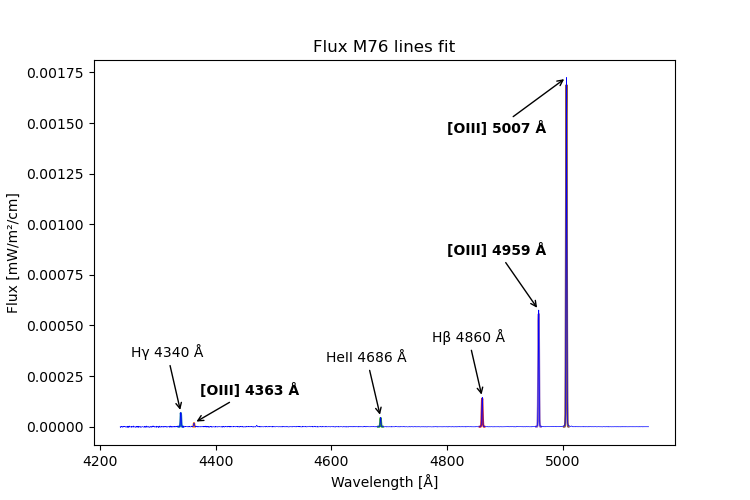

RMS list for each gaussian fit : [0.2564805018518258, 0.10470746986720791, 0.2564710016315222, 0.2564661714288564, 0.25646348524464696, 0.2564621667964322]
Corrolated RMS list for each gaussian fit : [0.7926199359272058, 0.32358533659476424, 0.7926052578919328, 0.7925977950398839, 0.7925936449007751, 0.7925916082936543]


<IPython.core.display.Javascript object>


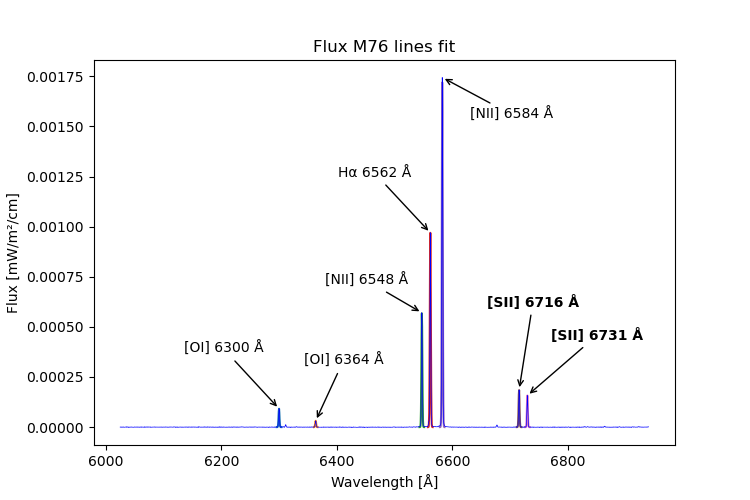

RMS list for each gaussian fit : [0.2572987821257737, 0.1967837223890673, 0.2586680035944073, 0.2587497112048134, 0.2588636066614632, 0.2596014511418304, 0.2596806827639206]
Corrolated RMS list for each gaussian fit : [0.7938835080489643, 0.6067528198542087, 0.7959925281039588, 0.7961186447776784, 0.7962932423982365, 0.7974281000279553, 0.7975495160803593]


In [7]:
#Approximations des pics par des gaussiennes:
line_center_index_blue=[]
line_center_index_blue = spf.find_lines_derivative(Blue_M76[:2000], flux_threshold=1.e-5)
line_center_index_blue[line_center_index_blue['line_type'] == 'emission']
print("%d emission lines identified" % len(line_center_index_blue))
print(line_center_index_blue)
line_center_index_blue=[line_center_index_blue['line_center_index'][i] for i in range(len(line_center_index_blue))]

line_center_index_red=[]
line_center_index_red = spf.find_lines_derivative(Red_M76[:2000], flux_threshold=2.4e-5)
line_center_index_red[line_center_index_red['line_type'] == 'emission']
print("%d emission lines identified" % len(line_center_index_red))
print(line_center_index_red)
line_center_index_red=[line_center_index_red['line_center_index'][i] for i in range(len(line_center_index_red))]

fig, ax1 = plt.subplots(1, 1, figsize=(7.5, 5))

O3_amp = []
O3_x = []
O3_std = []
rms_blue = []
rms_blue_corr = []
for l in line_center_index_blue:
    if l == line_center_index_blue[1]:
        Blue_width=1.5
        sub_region_blue = SpectralRegion((Blue_M76.spectral_axis[l].value-Blue_width)*u.AA, (Blue_M76.spectral_axis[l].value+Blue_width)*u.AA)
    else:
        Blue_width=4
        sub_region_blue = SpectralRegion((Blue_M76.spectral_axis[l].value-Blue_width)*u.AA, (Blue_M76.spectral_axis[l].value+Blue_width)*u.AA)
    sub_spectrum_blue = extract_region(Blue_M76, sub_region_blue)
    g = spf.estimate_line_parameters(sub_spectrum_blue, models.Gaussian1D())
    O3_amp.append(g.amplitude.value)
    O3_x.append(g.mean.value)
    O3_std.append(g.stddev.value)
    xx = np.linspace((Blue_M76.spectral_axis[l].value-Blue_width)*u.AA,(Blue_M76.spectral_axis[l].value+Blue_width)*u.AA,num=len(sub_spectrum_blue.spectral_axis))
    ax1.plot(xx, g(xx))
    res_blue=xx.value-sub_spectrum_blue.spectral_axis.value
    res_blue_corr=res_blue * (g.mean.value-xx.value)
    rms_blue.append(np.sqrt(np.mean(res_blue**2)))
    rms_blue_corr.append(np.sqrt(np.abs(np.mean(res_blue_corr))))
    
print("RMS list for each gaussian fit : "+str(rms_blue))
print("Corrolated RMS list for each gaussian fit : "+str(rms_blue_corr))

O3_Name=["Hγ 4340 Å","[OIII] 4363 Å","HeII 4686 Å","Hβ 4860 Å","[OIII] 4959 Å","[OIII] 5007 Å"]    
O3_offset=[(-10,40), (40,20), (-10,40), (-10,40), (-30,40), (-50,-40)]
O3_style=["normal","bold","normal","normal","bold","bold"]
for i in range(len(O3_Name)):
    ax1.annotate(O3_Name[i], xy=(O3_x[i], O3_amp[i]),  xycoords='data', weight=O3_style[i],
                xytext=O3_offset[i], textcoords='offset points', ha='center',
                arrowprops=dict(arrowstyle="->"))
ax1.plot(Blue_M76.spectral_axis, Blue_M76.flux, lw=0.5, c="blue")
ax1.set_xlabel("Wavelength [Å]")
ax1.set_ylabel("Flux [mW/m²/cm]")
ax1.set_title("Flux M76 lines fit")
plt.show()
    
fig, ax2 = plt.subplots(1, 1, figsize=(7.5, 5))
S2_amp = []
S2_x = []
S2_std = []
rms_red = []
rms_red_corr = []
for l in line_center_index_red:
    if l == line_center_index_red[1]:
        Red_width = 3
        sub_region_red = SpectralRegion((Red_M76.spectral_axis[l].value-Red_width)*u.AA, (Red_M76.spectral_axis[l].value+Red_width)*u.AA)
    else:
        Red_width = 4
        sub_region_red = SpectralRegion((Red_M76.spectral_axis[l].value-Red_width)*u.AA, (Red_M76.spectral_axis[l].value+Red_width)*u.AA)
    sub_spectrum_red = extract_region(Red_M76, sub_region_red)
    g = spf.estimate_line_parameters(sub_spectrum_red, models.Gaussian1D())
    S2_amp.append(g.amplitude.value)
    S2_x.append(g.mean.value)
    S2_std.append(g.stddev.value)
    xx = np.linspace((Red_M76.spectral_axis[l].value-Red_width)*u.AA,(Red_M76.spectral_axis[l].value+Red_width)*u.AA, num=len(sub_spectrum_red.spectral_axis))
    ax2.plot(xx, g(xx))
    res_red=xx.value-sub_spectrum_red.spectral_axis.value
    res_red_corr=res_red * (g.mean.value-xx.value)
    rms_red.append(np.sqrt(np.mean(res_red**2)))
    rms_red_corr.append(np.sqrt(np.abs(np.mean(res_red_corr))))

print("RMS list for each gaussian fit : "+str(rms_red))
print("Corrolated RMS list for each gaussian fit : "+str(rms_red_corr))

S2_Name=["[OI] 6300 Å","[OI] 6364 Å","[NII] 6548 Å","Hα 6562 Å","[NII] 6584 Å","[SII] 6716 Å", "[SII] 6731 Å"]    
S2_offset=[(-40,40), (20,40), (-40,20), (-40,40), (50,-30), (10,60), (50,40)]
S2_style=["normal","normal","normal","normal","normal","bold","bold"]
for i in range(len(S2_Name)):
    ax2.annotate(S2_Name[i], xy=(S2_x[i], S2_amp[i]),  xycoords='data', weight=S2_style[i],
                xytext=S2_offset[i], textcoords='offset points', ha='center',
                arrowprops=dict(arrowstyle="->"))
ax2.plot(Red_M76.spectral_axis, Red_M76.flux, lw=0.5, c="blue")
ax2.set_xlabel("Wavelength [Å]")
ax2.set_ylabel("Flux [mW/m²/cm]")
ax2.set_title("Flux M76 lines fit")
plt.show()

In [8]:
#Calcul des intensités
O3_intensity=[0,0,0]
O3_intensity_std=[0,0,0]
O3_intensity[0]=(O3_amp[1]) * np.sqrt(np.pi/2) * O3_std[1] * 1.e-11 #4363
O3_intensity[1]=(O3_amp[4]) * np.sqrt(np.pi/2) * O3_std[4] * 1.e-11 #4959
O3_intensity[2]=(O3_amp[5]) * np.sqrt(np.pi/2) * O3_std[5] * 1.e-11 #5007
O3_intensity_std[0]=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[1]]) * np.sqrt(np.pi/2) * O3_std[1] * 1.e-11)**2 + ((O3_amp[1]) * np.sqrt(np.pi/2) * rms_blue[1] * 1.e-11)**2) #4363
O3_intensity_std[1]=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[4]]) * np.sqrt(np.pi/2) * O3_std[4] * 1.e-11)**2 + ((O3_amp[4]) * np.sqrt(np.pi/2) * rms_blue[4] * 1.e-11)**2) #4959
O3_intensity_std[2]=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[5]]) * np.sqrt(np.pi/2) * O3_std[5] * 1.e-11)**2 + ((O3_amp[5]) * np.sqrt(np.pi/2) * rms_blue[5] * 1.e-11)**2) #5007
S2_intensity=[0,0]
S2_intensity_std=[0,0]
S2_intensity[0]=(S2_amp[5]) * np.sqrt(np.pi/2) * S2_std[5] * 1.e-11 #6716
S2_intensity[1]=(S2_amp[6]) * np.sqrt(np.pi/2) * S2_std[6] * 1.e-11 #6731
S2_intensity_std[0]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[5]]) * np.sqrt(np.pi/2) * S2_std[5] * 1.e-11)**2 + ((S2_amp[5]) * np.sqrt(np.pi/2) * rms_red[5] * 1.e-11)**2) #6716
S2_intensity_std[1]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[6]]) * np.sqrt(np.pi/2) * S2_std[6] * 1.e-11)**2 + ((S2_amp[6]) * np.sqrt(np.pi/2) * rms_red[6] * 1.e-11)**2) #6731
H_intensity=[0,0,0]
H_intensity_std=[0,0,0]
H_intensity[0]=(S2_amp[3]) * np.sqrt(np.pi/2) * S2_std[3] * 1.e-11 #6562
H_intensity[1]=(O3_amp[3]) * np.sqrt(np.pi/2) * O3_std[3] * 1.e-11 #4860
H_intensity[2]=(O3_amp[0]) * np.sqrt(np.pi/2) * O3_std[0] * 1.e-11 #4340
H_intensity_std[0]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[3]]) * np.sqrt(np.pi/2) * S2_std[3] * 1.e-11)**2 + ((S2_amp[3]) * np.sqrt(np.pi/2) * rms_red[3] * 1.e-11)**2) #6562
H_intensity_std[1]=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[3]]) * np.sqrt(np.pi/2) * O3_std[3] * 1.e-11)**2 + ((O3_amp[3]) * np.sqrt(np.pi/2) * rms_blue[3] * 1.e-11)**2) #4860
H_intensity_std[2]=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[0]]) * np.sqrt(np.pi/2) * O3_std[0] * 1.e-11)**2 + ((O3_amp[0]) * np.sqrt(np.pi/2) * rms_blue[0] * 1.e-11)**2) #4340
O1_intensity=[0,0]
O1_intensity_std=[0,0]
O1_intensity[0]=(S2_amp[0]) * np.sqrt(np.pi/2) * S2_std[0] * 1.e-11 #6300
O1_intensity[1]=(S2_amp[1]) * np.sqrt(np.pi/2) * S2_std[1] * 1.e-11 #6364
O1_intensity_std[0]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[0]]) * np.sqrt(np.pi/2) * S2_std[0] * 1.e-11)**2 + ((S2_amp[0]) * np.sqrt(np.pi/2) * rms_red[0] * 1.e-11)**2) #6300
O1_intensity_std[1]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[1]]) * np.sqrt(np.pi/2) * S2_std[1] * 1.e-11)**2 + ((S2_amp[1]) * np.sqrt(np.pi/2) * rms_red[1] * 1.e-11)**2) #6364
N2_intensity=[0,0]
N2_intensity_std=[0,0]
N2_intensity[0]=(S2_amp[2]) * np.sqrt(np.pi/2) * S2_std[2] * 1.e-11 #6548
N2_intensity[1]=(S2_amp[4]) * np.sqrt(np.pi/2) * S2_std[4] * 1.e-11 #6584
N2_intensity_std[0]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[2]]) * np.sqrt(np.pi/2) * S2_std[2] * 1.e-11)**2 + ((S2_amp[2]) * np.sqrt(np.pi/2) * rms_red[2] * 1.e-11)**2) #6548
N2_intensity_std[1]=np.sqrt(((Red_M76.uncertainty.array[line_center_index_red[4]]) * np.sqrt(np.pi/2) * S2_std[4] * 1.e-11)**2 + ((S2_amp[4]) * np.sqrt(np.pi/2) * rms_red[4] * 1.e-11)**2) #6584
He_intensity=(O3_amp[2]) * np.sqrt(np.pi/2) * O3_std[2] * 1.e-11 #4686
He_intensity_std=np.sqrt(((Blue_M76.uncertainty.array[line_center_index_blue[2]]) * np.sqrt(np.pi/2) * O3_std[2] * 1.e-11)**2 + ((O3_amp[2]) * np.sqrt(np.pi/2) * rms_blue[2] * 1.e-11)**2) #4686
print("Le pic de O[III] à "+str(O3_x[1]*u.AA)+" à une intensité de : "+str(O3_intensity[0])+" +- "+str(O3_intensity_std[0]*u.W/u.m/u.m))
print("\n")
print("Le pic de O[III] à "+str(O3_x[4]*u.AA)+" à une intensité de : "+str(O3_intensity[1])+" +- "+str(O3_intensity_std[1]*u.W/u.m/u.m))
print("\n")
print("Le pic de O[III] à "+str(O3_x[5]*u.AA)+" à une intensité de : "+str(O3_intensity[2])+" +- "+str(O3_intensity_std[2]*u.W/u.m/u.m))
print("\n")
print("Le pic de S[II] à "+str(S2_x[5]*u.AA)+" à une intensité de : "+str(S2_intensity[0])+" +- "+str(S2_intensity_std[0]*u.W/u.m/u.m))
print("\n")
print("Le pic de S[II] à "+str(S2_x[6]*u.AA)+" à une intensité de : "+str(S2_intensity[1])+" +- "+str(S2_intensity_std[1]*u.W/u.m/u.m))
print("\n")
print("Le pic de H à "+str(S2_x[3]*u.AA)+" à une intensité de : "+str(H_intensity[0])+" +- "+str(H_intensity_std[0]*u.W/u.m/u.m))
print("\n")
print("Le pic de H à "+str(O3_x[3]*u.AA)+" à une intensité de : "+str(H_intensity[1])+" +- "+str(H_intensity_std[1]*u.W/u.m/u.m))
print("\n")
print("Le pic de H à "+str(O3_x[0]*u.AA)+" à une intensité de : "+str(H_intensity[2])+" +- "+str(H_intensity_std[2]*u.W/u.m/u.m))
print("\n")
print("Le pic de O[I] à "+str(S2_x[0]*u.AA)+" à une intensité de : "+str(O1_intensity[0])+" +- "+str(O1_intensity_std[0]*u.W/u.m/u.m))
print("\n")
print("Le pic de O[I] à "+str(S2_x[1]*u.AA)+" à une intensité de : "+str(O1_intensity[1])+" +- "+str(O1_intensity_std[1]*u.W/u.m/u.m))
print("\n")
print("Le pic de N[II] à "+str(S2_x[2]*u.AA)+" à une intensité de : "+str(N2_intensity[0])+" +- "+str(N2_intensity_std[0]*u.W/u.m/u.m))
print("\n")
print("Le pic de N[II] à "+str(S2_x[4]*u.AA)+" à une intensité de : "+str(N2_intensity[1])+" +- "+str(N2_intensity_std[1]*u.W/u.m/u.m))
print("\n")
print("Le pic de HeII à "+str(O3_x[2]*u.AA)+" à une intensité de : "+str(He_intensity)+" +- "+str(He_intensity_std*u.W/u.m/u.m))

Le pic de O[III] à 4362.527112929131 Angstrom à une intensité de : 1.5094607826497322e-16 +- 4.369996274036136e-17 W / m2


Le pic de O[III] à 4958.173208801242 Angstrom à une intensité de : 5.1811938990432215e-15 +- 1.8524767453882906e-15 W / m2


Le pic de O[III] à 5006.1090329377985 Angstrom à une intensité de : 1.554845854103777e-14 +- 5.545539205697568e-15 W / m2


Le pic de S[II] à 6715.580340271352 Angstrom à une intensité de : 1.847536360452658e-15 +- 6.036121801338089e-16 W / m2


Le pic de S[II] à 6729.95381401414 Angstrom à une intensité de : 1.5388128013643777e-15 +- 5.133530601855735e-16 W / m2


Le pic de H à 6561.8370085978495 Angstrom à une intensité de : 1.0469964902502892e-14 +- 3.1443727355394055e-15 W / m2


Le pic de H à 4860.552005054846 Angstrom à une intensité de : 1.3783065799350856e-15 +- 4.668416078137699e-16 W / m2


Le pic de H à 4339.802109971122 Angstrom à une intensité de : 5.297169269548724e-16 +- 2.2647525456740924e-16 W / m2


Le pic de O[I] à 6299.67

In [9]:
#Calcul de la température électronique
Ratio_O3 = (O3_intensity[1] + O3_intensity[2])/(O3_intensity[0])
Ratio_O3_err = np.sqrt((O3_intensity_std[1]/O3_intensity[0])**2 + (O3_intensity_std[2]/O3_intensity[0])**2 + (((O3_intensity[1] + O3_intensity[2])*O3_intensity_std[0]/(O3_intensity[0]**2)))**2)
Te = 3.29*1.e4 * 1/np.log(Ratio_O3/8.32)
Te_err = 3.29*1.e4 * (1/(np.log((O3_intensity[1] + O3_intensity[2])/(8.32*O3_intensity[0]))**2)) * Ratio_O3_err/Ratio_O3
print("La température électronique Te est : "+str(Te)+" +- "+str(Te_err * u.K))
print("Le ratio O[III] est : "+str(Ratio_O3)+" +- "+str(Ratio_O3_err))
Ratio_S2 = S2_intensity[0]/S2_intensity[1]
Ratio_S2_err = np.sqrt((S2_intensity_std[0]/S2_intensity[1])**2 + (S2_intensity_std[1] * S2_intensity[0]/(S2_intensity[1]**2))**2)
Ne = ((Ratio_S2 - 1.49)/(5.6173e-2 - 12.8e-2 * Ratio_S2)) * np.sqrt(Te)
Ne_err = np.sqrt(((-1.34547e-1)/((5.6173e-2 - 12.8e-2 * Ratio_S2)**2) * Ratio_S2_err * np.sqrt(Te))**2 + ((Te_err/(2*np.sqrt(Te))) * ((Ratio_S2 - 1.49)/(5.6173e-2 - 12.8e-2 * Ratio_S2)))**2)
print("La densité électronique Ne est : "+str(Ne)+" +- "+str(Ne_err*1/u.cm/u.cm/u.cm))
print("Le ratio S[II] est : "+str(Ratio_S2)+" +- "+str(Ratio_S2_err))

La température électronique Te est : 11734.345088837475 +- 1691.6177791472155 K
Le ratio O[III] est : 137.33150723990204 +- 55.50736527593326
La densité électronique Ne est : 321.4812611460296 +- 859.7207680218265 1 / cm3
Le ratio S[II] est : 1.2006245066421029 +- 0.5606181937365364


In [10]:
#calcul distribution des vitesses
Speed_distribution_list=[]
Speed_distribution_list_std=[]
for i in range(len(O3_x)):
    Speed_distribution_list.append((O3_std[i]*3.e8/O3_x[i])*1.e-3/2*u.km/u.s + 16.7 * u.km/u.s)
    Speed_distribution_list_std.append(np.sqrt((((O3_std[i])/(O3_x[i]**2)) * O3_std[i])**2 + (rms_blue[i]/(O3_x[i]))**2 - 2 * (O3_std[i]/(O3_x[i]**3)) * rms_blue_corr[i]) * 3.e5/2 * u.km/u.s)
for i in range(len(S2_x)):
    Speed_distribution_list.append((S2_std[i]*3.e8/S2_x[i])*1.e-3/2*u.km/u.s + 16.7 * u.km/u.s)
    Speed_distribution_list_std.append(np.sqrt((((S2_std[i])/(S2_x[i]**2)) * S2_std[i])**2 + (rms_red[i]/(S2_x[i]))**2 - 2 * (S2_std[i]/(S2_x[i]**3)) * rms_red_corr[i]) * 3.e5/2 * u.km/u.s)

Speed_distribution=0
for i in Speed_distribution_list:
    Speed_distribution += i
Speed_distribution /= len(Speed_distribution_list)

Speed_distribution_std=0
for i in Speed_distribution_list_std:
    Speed_distribution_std += i**2
Speed_distribution_std = np.sqrt(Speed_distribution_std/len(Speed_distribution_list_std))    

print("La vitesse d'expansion est : "+str(Speed_distribution)+" +- "+str(Speed_distribution_std))

La vitesse d'expansion est : 36.75290411782536 km / s +- 6.621587152565258 km / s


In [11]:
#Calcul vitesse radiale
O3_x_True=[4340, 4363, 4686, 4860, 4959, 5007]
S2_x_True=[6300, 6364, 6548, 6562, 6584, 6716, 6731]
Radial_velocity_list=[]
Radial_velocity_list_std=[]
for i in range(len(O3_x)):
    Radial_velocity_list.append(((O3_x[i]-O3_x_True[i])*3.e8/O3_x_True[i])*1.e-3*u.km/u.s + 16.7 * u.km/u.s)
    Radial_velocity_list_std.append((O3_std[i])*3.e5/(O3_x_True[i]) * u.km/u.s)
for i in range(len(S2_x)):
    Radial_velocity_list.append(((S2_x[i]-S2_x_True[i])*3.e8/S2_x_True[i])*1.e-3*u.km/u.s + 16.8 * u.km/u.s)
    Radial_velocity_list_std.append((S2_std[i])*3.e5/(S2_x[i]) * u.km/u.s)
    
Radial_velocity=0
for i in Radial_velocity_list:
    Radial_velocity += i
Radial_velocity /= len(Radial_velocity_list)
    
Radial_velocity_std=0
for i in Radial_velocity_list_std:
    Radial_velocity_std += i**2
Radial_velocity_std = np.sqrt(Radial_velocity_std/len(Radial_velocity_list_std))
    
print("La vitesse radiale est : "+str(Radial_velocity)+" +- "+str(Radial_velocity_std))

La vitesse radiale est : -14.658190751237148 km / s +- 40.27170184061042 km / s


In [12]:
# Metalicité (pour s'amuser, mais inutile)

Metalicity = (O1_intensity[0] + O1_intensity[1] + O3_intensity[0] + O3_intensity[1] + O3_intensity[2])/(H_intensity[0] + H_intensity[1] + H_intensity[2])
print("La métalicité est : "+str(Metalicity))

La métalicité est : 1.7866362670505302


In [13]:
# Reddening
Reddening = H_intensity[0]/H_intensity[1]
Reddening_std = np.sqrt((H_intensity_std[0]/H_intensity[1])**2 + (H_intensity_std[1]*H_intensity[0]/(H_intensity[1]**2))**2)
print("Le facteur rougissement est : "+str(Reddening)+" +- "+str(Reddening_std))

Le facteur rougissement est : 7.596252571758018 +- 3.4386464640375443
